In [27]:
"""
Canada Weather Data Visualization
____________________________________________________________________________________________
Data obtained from: https://www.kaggle.com/datasets/hemil26/canada-weather?resource=download

This script performs advanced data cleaning and visualization on Canadian cities' weather data.
This is self-initiated for practice using Pythons visualization tools.

Author: Debopriya Basu
"""

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Read File-
os.chdir(r"...\Canada Weather")
df = pd.read_csv("canada_weather.csv")
df.head(4)

# Degree symbol: °

,Community,Weather station,Location,Elevation,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F))
0,"Alberton, PE",NaN,46°51′00″N 064°01′00″W / 46.85000°N 64.01667°W...,3m (9.8ft),−3.9 (25.0),−12.5 (9.5),23.2 (73.8),14.1 (57.4),9.6 (49.3),1.3 (34.3)
1,"Baker Lake, NU",YBK,64°17′56″N 096°04′40″W / 64.29889°N 96.07778°W...,18.6m (61ft),−27.7 (−17.9),−34.8 (−30.6),17.0 (62.6),6.1 (43.0),−7.3 (18.9),−15.2 (4.6)
2,"Baie-Comeau, QC",YBC,49°08′00″N 068°12′00″W / 49.13333°N 68.20000°W...,22m (72ft),−8.7 (16.3),−19.9 (−3.8),20.9 (69.6),10.3 (50.5),6.6 (43.9),−3.3 (26.1)
3,"Calgary, AB",YYC,51°06′50″N 114°01′13″W / 51.11389°N 114.02028°...,"1,084m (3,556ft)",−0.9 (30.4),−13.2 (8.2),23.2 (73.8),9.8 (49.6),10.8 (51.4),−1.9 (28.6)


In [43]:
# Data Cleaning

def extract_celsius(temp_str):
    if pd.isnull(temp_str):
        return None
    temp_str = str(temp_str).replace('−', '-')
    match = re.search(r'-?[\d\.]+', temp_str)
    return float(match.group()) if match else None

temp_cols = [
    'January(Avg. high °C (°F))',
    'January(Avg. low °C (°F))',
    'July(Avg. high °C (°F))',
    'July(Avg. low °C (°F))',
    'Annual(Avg. high °C (°F))',
    'Annual(Avg. low °C (°F))'
]
for col in temp_cols:
    df[col] = df[col].apply(extract_celsius)

df['Elevation_m'] = (
    df['Elevation']
    .str.extract(r'([\d,\.]+)m')[0]
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Extract Province from Community
def extract_province(community):
    try:
        return community.split(",")[-1].strip()
    except:
        return None

df['Province'] = df['Community'].apply(extract_province)
df['City'] = df['Community'].apply(lambda x: x.split(',')[0].strip())


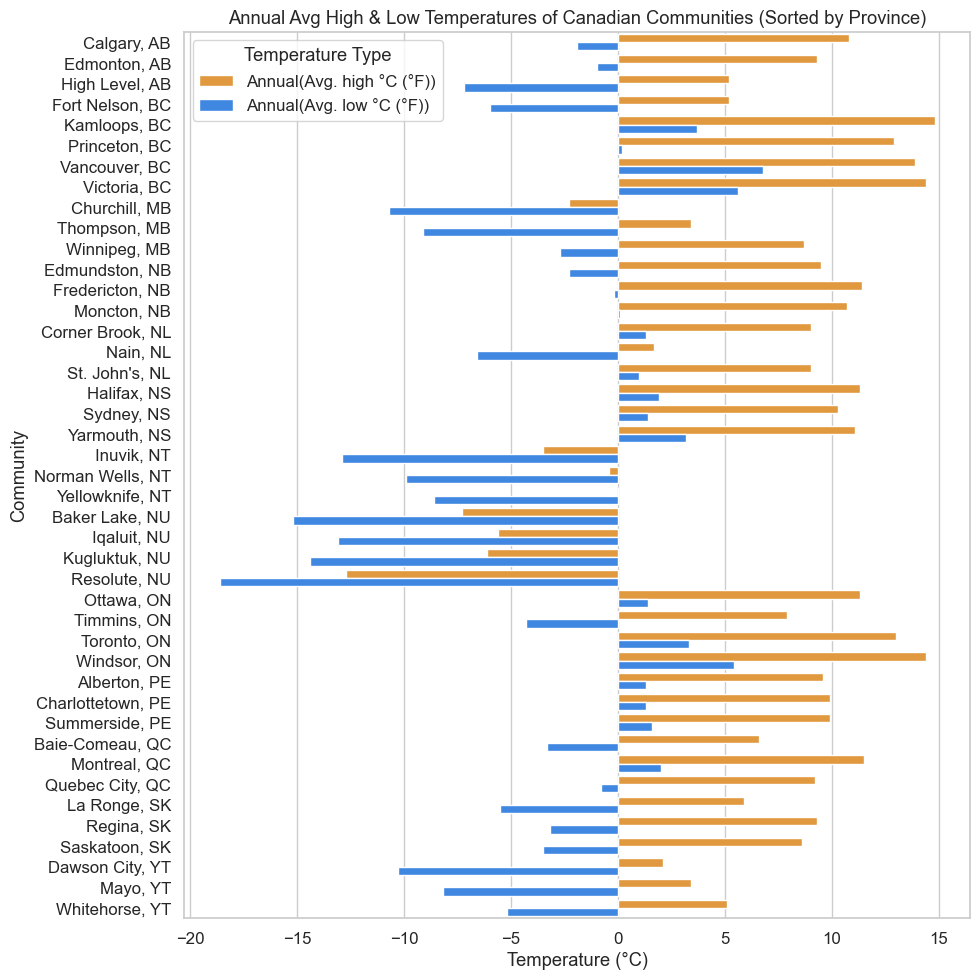

In [45]:
# Plot Configuration

sns.set_theme(style="whitegrid", palette=None, font_scale=1.1)

# 1. Annual Temperature Comparison Bar Plot (By Province & City)

# Sort by Province (first) and City (second)
sorted_df = df.sort_values(['Province', 'City'])

# Melt for plotting both high and low temperatures
melted = sorted_df.melt(
    id_vars=['Community', 'Province'], 
    value_vars=['Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))'], 
    var_name='Temperature Type', value_name='Temperature'
)

# Custom color palette for high (red) and low (blue). Cf ColorHexa website: https://www.colorhexa.com/
custom_palette = {
    'Annual(Avg. high °C (°F))': '#fc9c24',  # red
    'Annual(Avg. low °C (°F))': '#2484fc'    # pastel blue
}

plt.figure(figsize=(10, 10))
sns.barplot(
    data=melted,
    y='Community',
    x='Temperature',
    hue='Temperature Type',
    hue_order=['Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))'],
    palette=custom_palette
)
plt.title('Annual Avg High & Low Temperatures of Canadian Communities (Sorted by Province)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Community')
plt.tight_layout()
plt.show()


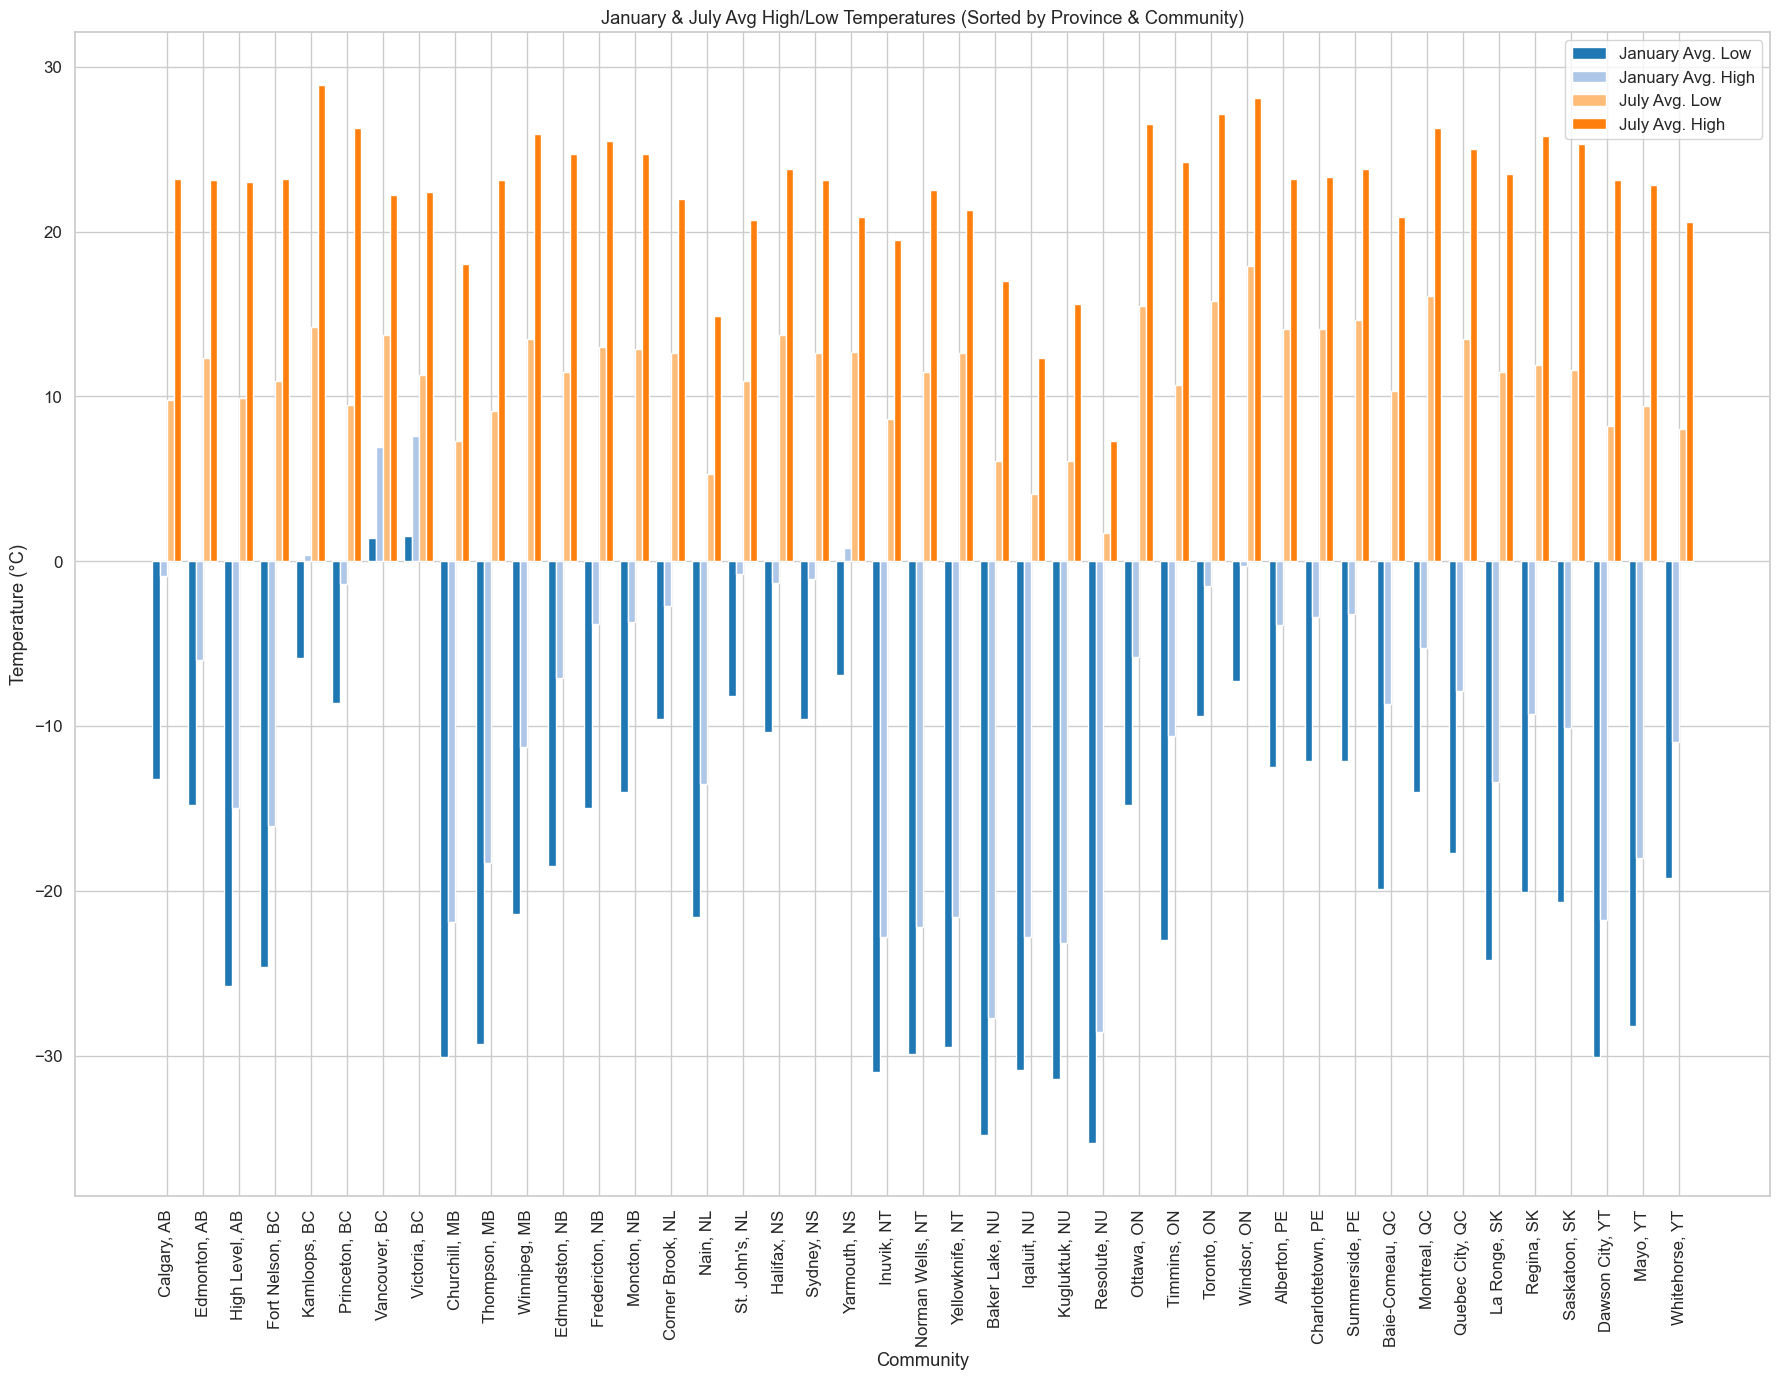

In [46]:
# 2. January & July High/Low Temperature Comparison (Grouped Bar Plot, sorted by Province)

plt.figure(figsize=(18, 14))
sorted_df = df.sort_values(['Province', 'City'])
bar_width = 0.2
x = range(len(sorted_df))

# Plotting bars (4 sets: Jan Low, Jan High, July Low, July High)
plt.bar(
    [i - 1.5 * bar_width for i in x],
    sorted_df['January(Avg. low °C (°F))'],
    width=bar_width,
    label='January Avg. Low',
    color='#1f77b4'
)
plt.bar(
    [i - 0.5 * bar_width for i in x],
    sorted_df['January(Avg. high °C (°F))'],
    width=bar_width,
    label='January Avg. High',
    color='#aec7e8'
)
plt.bar(
    [i + 0.5 * bar_width for i in x],
    sorted_df['July(Avg. low °C (°F))'],
    width=bar_width,
    label='July Avg. Low',
    color='#ffbb78'
)
plt.bar(
    [i + 1.5 * bar_width for i in x],
    sorted_df['July(Avg. high °C (°F))'],
    width=bar_width,
    label='July Avg. High',
    color='#ff7f0e'
)

plt.xticks([i for i in x], sorted_df['Community'], rotation=90)
plt.title('January & July Avg High/Low Temperatures (Sorted by Province & Community)')
plt.xlabel('Community')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


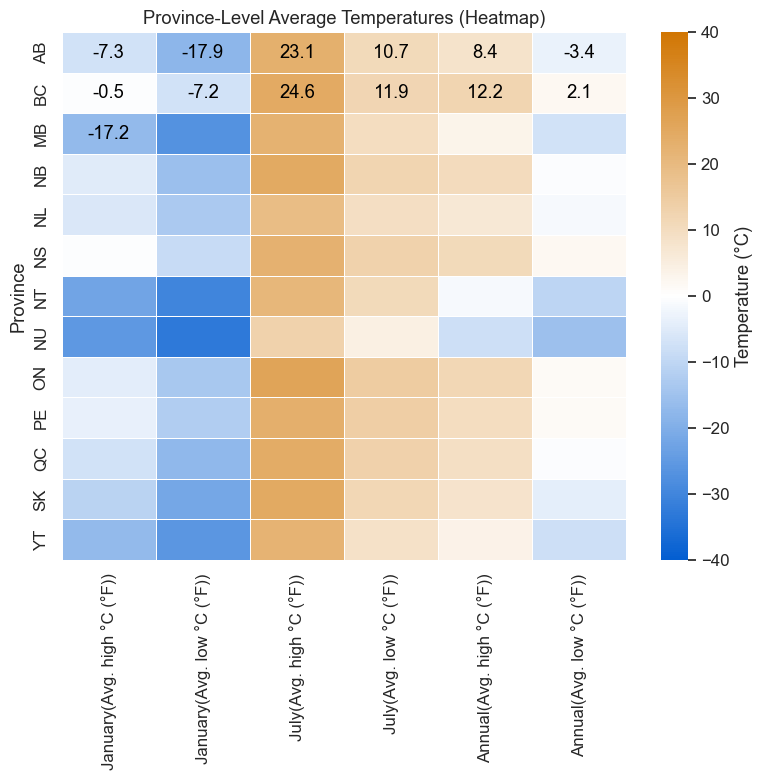

In [48]:
# 3. Province-Level Temperature Heatmap (Centered at 0°C)

province_avg = df.groupby('Province')[temp_cols].mean()

# Custom colormap 
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_temp",
    ['#035ed1', 'white', '#d17603'],  
    N=400
)

# Heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(
    province_avg,
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cmap=custom_cmap,
    vmin=-40,
    vmax=40,
    center=0,
    cbar_kws={"label": "Temperature (°C)"},
    annot_kws={"color": "black"}
)
plt.title('Province-Level Average Temperatures (Heatmap)')
plt.tight_layout()
plt.show()


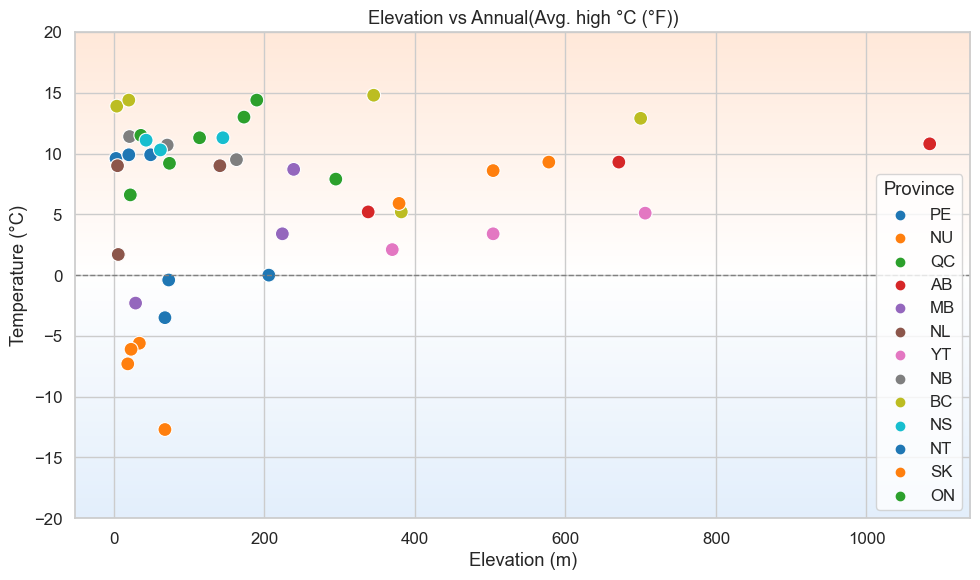

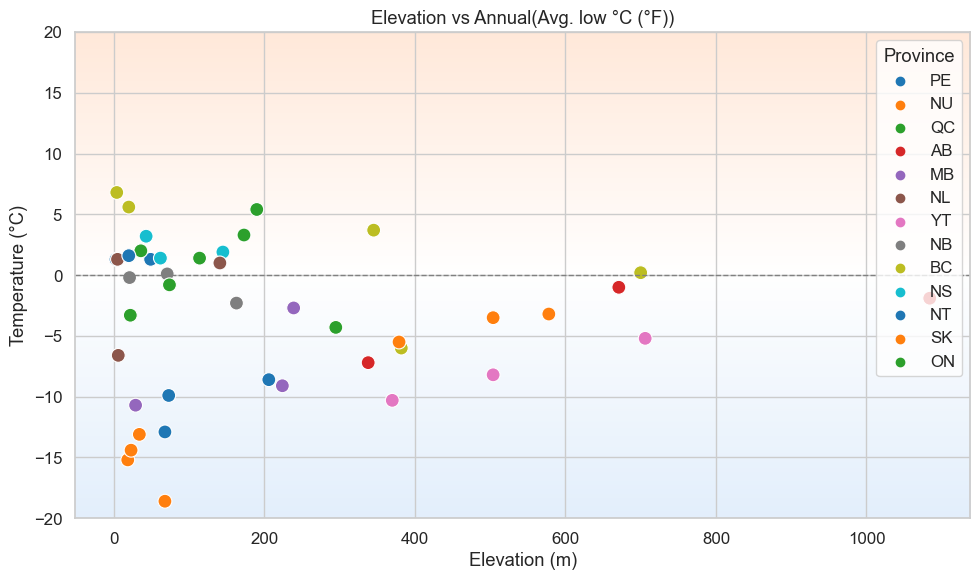

In [49]:
# 4. Elevation vs Annual Avg Temp

for temp_col in ['Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))']:
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(
        data=df, 
        x='Elevation_m', 
        y=temp_col, 
        hue='Province', 
        palette='tab10', 
        s=100
    )

    # Custom Gradient Map (blue (cooler) > white > orange (warmer))
    gradient = np.linspace(-1, 1, 256).reshape(-1, 1)
    pastel_cmap = LinearSegmentedColormap.from_list(
        "vertical_gradient",
        [sns.color_palette("pastel")[1], "white", sns.color_palette("pastel")[0]],
        N=256
    )

    # Background gradient (mapped to Y-axis: Temperature)
    ax.imshow(
        gradient,
        aspect='auto',
        cmap=pastel_cmap,
        extent=(ax.get_xlim()[0], ax.get_xlim()[1], -20, 20),
        alpha=0.3,
        zorder=0
    )

    # Foreground elements
    plt.title(f'Elevation vs {temp_col}')
    plt.xlabel('Elevation (m)')
    plt.ylabel('Temperature (°C)')
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.ylim(-20, 20)  # Adjust based on your data
    plt.tight_layout()
    plt.show()


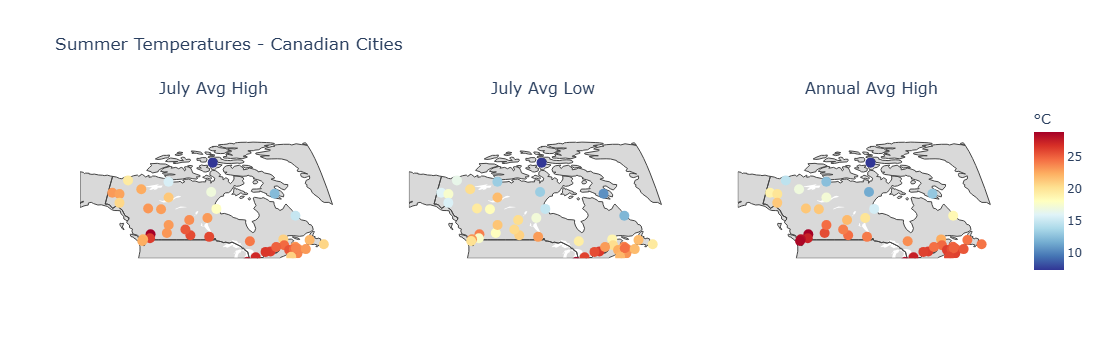

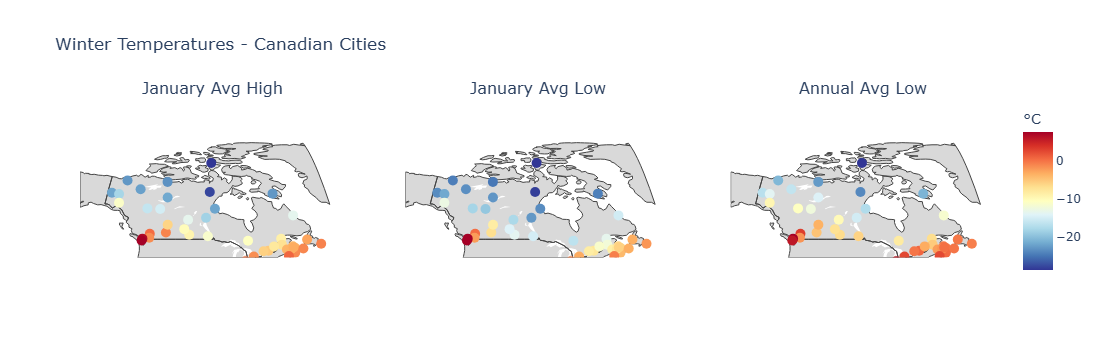

In [50]:
# 5. Choropleth-Style Scatter Maps (Canada)

# Coordinates extraction
def extract_coords(location_str):
    if pd.isnull(location_str):
        return None, None
    try:
        parts = location_str.split('/')
        coords = parts[1].strip().split()
        lat = float(coords[0].replace('°N', ''))
        lon = -float(coords[1].replace('°W', ''))
        return lat, lon
    except:
        return None, None

df[['Latitude', 'Longitude']] = df['Location'].apply(lambda loc: pd.Series(extract_coords(loc)))

summer_cols = [
    ('July(Avg. high °C (°F))', "July Avg High"),
    ('July(Avg. low °C (°F))', "July Avg Low"),
    ('Annual(Avg. high °C (°F))', "Annual Avg High")
]
winter_cols = [
    ('January(Avg. high °C (°F))', "January Avg High"),
    ('January(Avg. low °C (°F))', "January Avg Low"),
    ('Annual(Avg. low °C (°F))', "Annual Avg Low")
]

for col_set, title in [(summer_cols, 'Summer'), (winter_cols, 'Winter')]:
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=[title for _, title in col_set],
        specs=[[{"type": "scattergeo"}] * 3]
    )
    for idx, (col, subplot_title) in enumerate(col_set):
        fig.add_trace(
            go.Scattergeo(
                lon=df['Longitude'],
                lat=df['Latitude'],
                text=df['Community'] + '<br>' + df[col].astype(str) + '°C',
                marker=dict(
                    size=10,
                    color=df[col],
                    colorscale='RdYlBu_r',
                    colorbar_title='°C' if idx == 0 else None
                ),
            ),
            row=1, col=idx + 1
        )

    # Layout
    fig.update_layout(
        height=300,
        title_text=f'{title} Temperatures - Canadian Cities',
        showlegend=False,
    )

    # Individual geo settings per subplot (to Zoom-in on Canada)
    for i in range(1, 4):
        fig.update_geos(
            scope='north america',
            projection_type='natural earth',
            showcountries=True,
            showsubunits=True,
            showland=True,
            landcolor='rgb(217, 217, 217)',
            lataxis_range=[40, 90],  # Latitude bounds for Canada
            lonaxis_range=[-145, -45],  # Longitude bounds for Canada
            row=1, col=i
        )

    fig.show()


In [40]:
# NEXT: Use Folium to make better Choropleth-Style Maps using the average temperatures for provinces.
# See: https://dataplotplus.com/how-to-make-a-choropleth-map-in-python/